In [1]:
import math
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import time

In [2]:
from datetime import date
import matplotlib.pyplot as plot
from numpy.random import seed
from pylab import rcParams
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler

In [3]:
from tensorflow import set_random_seed
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.utils import plot_model

Using TensorFlow backend.


In [4]:
ls  = pd.read_csv('C:/Users/RISHABH/Documents/LATESTSOYBEANINDIA.csv')

In [5]:
ls

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Date
0,1,Chittor,Madanapalli,Soyabean,Soyabeen,Medium,2600.0,3000.0,2700.0,08-Dec-15
1,2,Chittor,Madanapalli,Soyabean,Local,Medium,2600.0,3000.0,2700.0,07-Dec-15
2,3,Chittor,Madanapalli,Soyabean,Soyabeen,Medium,2600.0,3000.0,2700.0,30-Nov-15
3,4,Chittor,Madanapalli,Soyabean,Soyabeen,Medium,2600.0,3000.0,2700.0,29-Nov-15
4,5,Chittor,Madanapalli,Soyabean,Soyabeen,Medium,2600.0,3000.0,2700.0,28-Nov-15
5,6,Saharsa,Saharsa,Soyabean,Soyabeen,FAQ,8000.0,8200.0,8100.0,12-Feb-15
6,7,Saharsa,Saharsa,Soyabean,Soyabeen,FAQ,8100.0,8200.0,8150.0,11-Feb-15
7,8,Saharsa,Saharsa,Soyabean,Soyabeen,FAQ,8200.0,8300.0,8250.0,10-Feb-15
8,9,Saharsa,Saharsa,Soyabean,Soyabeen,FAQ,8000.0,8200.0,8100.0,09-Feb-15
9,10,Raipur,Arang,Soyabean,Soyabeen,FAQ,3255.0,3255.0,3255.0,30-Nov-19


In [6]:
ls = ls.drop(ls.columns[[0,3,6,7]], axis=1)

In [7]:
ls

,District Name,Market Name,Variety,Grade,Modal Price (Rs./Quintal),Date
0,Chittor,Madanapalli,Soyabeen,Medium,2700.0,08-Dec-15
1,Chittor,Madanapalli,Local,Medium,2700.0,07-Dec-15
2,Chittor,Madanapalli,Soyabeen,Medium,2700.0,30-Nov-15
3,Chittor,Madanapalli,Soyabeen,Medium,2700.0,29-Nov-15
4,Chittor,Madanapalli,Soyabeen,Medium,2700.0,28-Nov-15
5,Saharsa,Saharsa,Soyabeen,FAQ,8100.0,12-Feb-15
6,Saharsa,Saharsa,Soyabeen,FAQ,8150.0,11-Feb-15
7,Saharsa,Saharsa,Soyabeen,FAQ,8250.0,10-Feb-15
8,Saharsa,Saharsa,Soyabeen,FAQ,8100.0,09-Feb-15
9,Raipur,Arang,Soyabeen,FAQ,3255.0,30-Nov-19


In [8]:
nk = ls[ls['District Name']=='Indore']

In [9]:
nk

,District Name,Market Name,Variety,Grade,Modal Price (Rs./Quintal),Date
119815,Indore,Gautampura,Other,FAQ,3800.0,06-Dec-19
119816,Indore,Gautampura,Other,FAQ,3750.0,05-Dec-19
119817,Indore,Gautampura,Other,FAQ,3850.0,04-Dec-19
119818,Indore,Gautampura,Other,FAQ,3820.0,03-Dec-19
119819,Indore,Gautampura,Other,FAQ,3800.0,02-Dec-19
119820,Indore,Gautampura,Other,FAQ,3850.0,30-Nov-19
119821,Indore,Gautampura,Other,FAQ,3850.0,29-Nov-19
119822,Indore,Gautampura,Other,FAQ,3750.0,28-Nov-19
119823,Indore,Gautampura,Other,FAQ,3820.0,27-Nov-19
119824,Indore,Gautampura,Other,FAQ,3800.0,26-Nov-19


In [10]:
nk['Date'] = pd.to_datetime(nk['Date'], infer_datetime_format=True)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
nk

,District Name,Market Name,Variety,Grade,Modal Price (Rs./Quintal),Date
119815,Indore,Gautampura,Other,FAQ,3800.0,2019-12-06
119816,Indore,Gautampura,Other,FAQ,3750.0,2019-12-05
119817,Indore,Gautampura,Other,FAQ,3850.0,2019-12-04
119818,Indore,Gautampura,Other,FAQ,3820.0,2019-12-03
119819,Indore,Gautampura,Other,FAQ,3800.0,2019-12-02
119820,Indore,Gautampura,Other,FAQ,3850.0,2019-11-30
119821,Indore,Gautampura,Other,FAQ,3850.0,2019-11-29
119822,Indore,Gautampura,Other,FAQ,3750.0,2019-11-28
119823,Indore,Gautampura,Other,FAQ,3820.0,2019-11-27
119824,Indore,Gautampura,Other,FAQ,3800.0,2019-11-26


In [12]:
kn= pd.DataFrame(nk, columns=["Date","District Name","Market Name",'Variety','Grade','Modal Price (Rs./Quintal)'])

In [13]:
kn

,Date,District Name,Market Name,Variety,Grade,Modal Price (Rs./Quintal)
119815,2019-12-06,Indore,Gautampura,Other,FAQ,3800.0
119816,2019-12-05,Indore,Gautampura,Other,FAQ,3750.0
119817,2019-12-04,Indore,Gautampura,Other,FAQ,3850.0
119818,2019-12-03,Indore,Gautampura,Other,FAQ,3820.0
119819,2019-12-02,Indore,Gautampura,Other,FAQ,3800.0
119820,2019-11-30,Indore,Gautampura,Other,FAQ,3850.0
119821,2019-11-29,Indore,Gautampura,Other,FAQ,3850.0
119822,2019-11-28,Indore,Gautampura,Other,FAQ,3750.0
119823,2019-11-27,Indore,Gautampura,Other,FAQ,3820.0
119824,2019-11-26,Indore,Gautampura,Other,FAQ,3800.0


In [14]:
kn.columns = [str(x).lower().replace(' ', '_') for x in kn.columns]

In [15]:
kn.sort_values(by='date', inplace=True, ascending=True)

In [16]:
kn

,date,district_name,market_name,variety,grade,modal_price_(rs./quintal)
244101,2010-01-01,Indore,Sanwer,Yellow,FAQ,2300.0
136351,2010-01-01,Indore,Indore(F&V),Yellow,FAQ,2300.0
136350,2010-01-02,Indore,Indore(F&V),Yellow,FAQ,2290.0
244100,2010-01-02,Indore,Sanwer,Yellow,FAQ,2265.0
244099,2010-01-04,Indore,Sanwer,Yellow,FAQ,2300.0
136349,2010-01-04,Indore,Indore(F&V),Yellow,FAQ,2300.0
136348,2010-01-05,Indore,Indore(F&V),Yellow,FAQ,2300.0
244098,2010-01-05,Indore,Sanwer,Yellow,FAQ,2302.0
136347,2010-01-06,Indore,Indore(F&V),Yellow,FAQ,2280.0
244097,2010-01-06,Indore,Sanwer,Yellow,FAQ,2285.0


In [17]:
io = kn[((kn.date >= '2017-01-01'))] 

In [18]:
io

,date,district_name,market_name,variety,grade,modal_price_(rs./quintal)
134590,2017-01-02,Indore,Indore,Yellow,FAQ,2850.0
120517,2017-01-03,Indore,Gautampura,Other,FAQ,3025.0
191999,2017-01-03,Indore,Mhow,Other,FAQ,2870.0
134589,2017-01-03,Indore,Indore,Yellow,FAQ,2900.0
242358,2017-01-03,Indore,Sanwer,Yellow,FAQ,2900.0
242357,2017-01-04,Indore,Sanwer,Yellow,FAQ,2839.0
120516,2017-01-04,Indore,Gautampura,Other,FAQ,2900.0
191998,2017-01-04,Indore,Mhow,Other,FAQ,2895.0
134588,2017-01-04,Indore,Indore,Yellow,FAQ,2880.0
191997,2017-01-05,Indore,Mhow,Other,FAQ,2880.0


In [19]:
io = io.drop(io.columns[[1,2,3,4]], axis=1)

In [20]:
# io['date'] = io['date'].astype(str)
# # # io['district_name'] = io['district_name'].values.astype(str)
# # # io['market_name'] = io['market_name'].values.astype(str)
# # # io['variety'] = io['variety'].values.astype(str)
# # # io['grade'] = io['grade'].values.astype(str)
# # io['modal_price_(rs./quintal)'] = io['modal_price_(rs./quintal)'].values.astype(str)
# # # io = pd.io(y=io['modal_price_(rs./quintal)'], x=io['date'], intercept=True)
# # io[~io.isin([np.nan, np.inf, -np.inf]).any(1)].astype(np.float64)
# # # io = pd.io(y=io['modal_price_(rs./quintal)'], x=io['date'], intercept=True)


In [21]:
# io['date'] = io['date'].astype(str)
# # io[~io.isin([np.nan, np.inf, -np.inf]).any(1)].astype(np.float64)

In [22]:
io = io.dropna()
io

,date,modal_price_(rs./quintal)
134590,2017-01-02,2850.0
120517,2017-01-03,3025.0
191999,2017-01-03,2870.0
134589,2017-01-03,2900.0
242358,2017-01-03,2900.0
242357,2017-01-04,2839.0
120516,2017-01-04,2900.0
191998,2017-01-04,2895.0
134588,2017-01-04,2880.0
191997,2017-01-05,2880.0


In [23]:
io['date'] = io['date'].astype(str)
io

,date,modal_price_(rs./quintal)
134590,2017-01-02,2850.0
120517,2017-01-03,3025.0
191999,2017-01-03,2870.0
134589,2017-01-03,2900.0
242358,2017-01-03,2900.0
242357,2017-01-04,2839.0
120516,2017-01-04,2900.0
191998,2017-01-04,2895.0
134588,2017-01-04,2880.0
191997,2017-01-05,2880.0


In [43]:
io[io==np.inf]=np.nan
io.fillna(io.mean(), inplace=True)

In [44]:
test_size = 0.2  
cv_size = 0.2 
N = 9 
lstm_units=50  
dropout_prob=1    
optimizer='adam'
epochs=1 
batch_size=1 

In [45]:
model_seed = 100
fontsize = 14
ticklabelsize = 14

In [46]:
seed(101)
set_random_seed(model_seed)

### Common Functions

In [47]:
def get_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def get_x_y(data, N, offset):
    x, y = [], []
    for i in range(offset, len(data)):
        x.append(data[i-N:i])
        y.append(data[i])
    x = np.array(x)
    y = np.array(y)
    
    return x, y
def get_x_scaled_y(data, N, offset):
    x_scaled, y, mu_list, std_list = [], [], [], []
    for i in range(offset, len(data)):
        mu_list.append(np.mean(data[i-N:i]))
        std_list.append(np.std(data[i-N:i]))
        x_scaled.append((data[i-N:i]-mu_list[i-offset])/std_list[i-offset])
        y.append(data[i])
    x_scaled = np.array(x_scaled)
    y = np.array(y)
    
    return x_scaled, y, mu_list, std_list
def train_pred_eval_model(x_train_scaled, \
                          y_train_scaled, \
                          x_cv_scaled, \
                          y_cv, \
                          mu_cv_list, \
                          std_cv_list, \
                          lstm_units=50, \
                          dropout_prob=0.5, \
                          optimizer='adam', \
                          epochs=1, \
                          batch_size=1):
    # Compile and fit the LSTM network
    model = Sequential()
    model.add(LSTM(units=lstm_units, return_sequences=True, input_shape=(x_train_scaled.shape[1],1)))
    model.add(Dropout(dropout_prob)) 
    model.add(LSTM(units=lstm_units))
    model.add(Dropout(dropout_prob))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    model.fit(x_train_scaled, y_train_scaled, epochs=epochs, batch_size=batch_size, verbose=0)
    # Do prediction
    est_scaled = model.predict(x_cv_scaled)
    est = (est_scaled * np.array(std_cv_list).reshape(-1,1)) + np.array(mu_cv_list).reshape(-1,1)
    np.any(np.isnan(est))
    np.all(np.isfinite(est))
     
    # Calculate RMSE and MAPE
#     print("x_cv_scaled = " + str(x_cv_scaled))
#     print("est_scaled = " + str(est_scaled))
#     print("est = " + str(est))
    print(type(est),type(y_cv))
    print(est.shape, y_cv.shape)
    rmse = math.sqrt(mean_squared_error(y_cv, est))
    mape = get_mape(y_cv, est)
    
    return rmse, mape, est



Text(0, 0.5, 'USD')

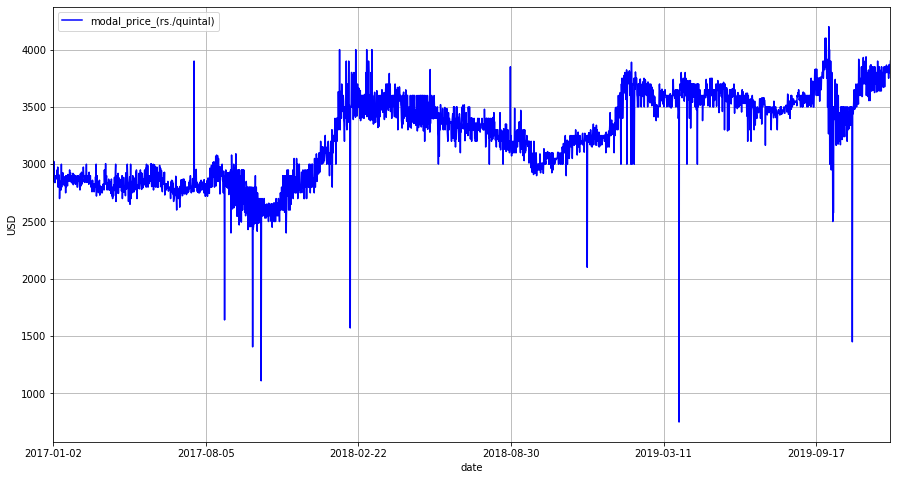

In [48]:
rcParams['figure.figsize'] = 15, 8 # width 10, height 8

ax = io.plot(x='date', y='modal_price_(rs./quintal)', style='b-', grid=True)
ax.set_xlabel("date")
ax.set_ylabel("USD")

### Split into train, dev and test sets

In [49]:
num_cv = int(cv_size*len(io))
num_test = int(test_size*len(io))
num_train = len(io) - num_cv - num_test
print("num_train = " + str(num_train))
print("num_cv = " + str(num_cv))
print("num_test = " + str(num_test))

# Split into train, cv, and test
train = io[:num_train][['date', 'modal_price_(rs./quintal)']]
cv = io[num_train:num_train+num_cv][['date', 'modal_price_(rs./quintal)']]
train_cv = io[:num_train+num_cv][['date', 'modal_price_(rs./quintal)']]
test = io[num_train+num_cv:][['date', 'modal_price_(rs./quintal)']]

print("train.shape = " + str(train.shape))
print("cv.shape = " + str(cv.shape))
print("train_cv.shape = " + str(train_cv.shape))
print("test.shape = " + str(test.shape))

num_train = 1647
num_cv = 549
num_test = 549
train.shape = (1647, 2)
cv.shape = (549, 2)
train_cv.shape = (2196, 2)
test.shape = (549, 2)


In [50]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(np.array(train['modal_price_(rs./quintal)']).reshape(-1,1))
print("scaler.mean_ = " + str(scaler.mean_))
print("scaler.var_ = " + str(scaler.var_))

# Split into x and y
x_train_scaled, y_train_scaled = get_x_y(train_scaled, N, N)
print("x_train_scaled.shape = " + str(x_train_scaled.shape)) 
print("y_train_scaled.shape = " + str(y_train_scaled.shape))

scaler.mean_ = [3056.82817243]
scaler.var_ = [106923.12469508]
x_train_scaled.shape = (1638, 9, 1)
y_train_scaled.shape = (1638, 1)


In [51]:
x_cv_scaled, y_cv, mu_cv_list, std_cv_list = get_x_scaled_y(np.array(train_cv['modal_price_(rs./quintal)']).reshape(-1,1), N, num_train)
print("x_cv_scaled.shape = " + str(x_cv_scaled.shape))
print("y_cv.shape = " + str(y_cv.shape))
print("len(mu_cv_list) = " + str(len(mu_cv_list)))
print("len(std_cv_list) = " + str(len(std_cv_list)))

x_cv_scaled.shape = (549, 9, 1)
y_cv.shape = (549, 1)
len(mu_cv_list) = 549
len(std_cv_list) = 549


In [52]:
scaler_final = StandardScaler()
train_cv_scaled_final = scaler_final.fit_transform(np.array(train_cv['modal_price_(rs./quintal)']).reshape(-1,1))
print("scaler_final.mean_ = " + str(scaler_final.mean_))
print("scaler_final.var_ = " + str(scaler_final.var_))

scaler_final.mean_ = [3155.23952641]
scaler_final.var_ = [126145.67304604]


### Create and fit the LSTM network

In [53]:
model = Sequential()
model.add(LSTM(units=lstm_units, return_sequences=True, input_shape=(x_train_scaled.shape[1],1)))
model.add(Dropout(dropout_prob)) # Add dropout with a probability of 0.5
model.add(LSTM(units=lstm_units))
model.add(Dropout(dropout_prob)) # Add dropout with a probability of 0.5
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer=optimizer)
model.fit(x_train_scaled, y_train_scaled, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/1
 - 39s - loss: 0.1883


In [54]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 9, 50)             10400     
_________________________________________________________________
dropout_7 (Dropout)          (None, 9, 50)             0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [55]:
from IPython.display import SVG
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
# import os
# os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin)'
# plot_model(model, to_file=('C:\Program Files (x86)\Graphviz2.38\bin'))

### Predict on dev set

In [56]:
# Do prediction
est_scaled = model.predict(x_cv_scaled)
est = (est_scaled * np.array(std_cv_list).reshape(-1,1)) + np.array(mu_cv_list).reshape(-1,1)
print("est.shape = " + str(est.shape))

# Calculate RMSE
rmse_bef_tuning = math.sqrt(mean_squared_error(y_cv, est))
print("RMSE = %0.3f" % rmse_bef_tuning)

# Calculate MAPE
mape_pct_bef_tuning = get_mape(y_cv, est)
print("MAPE = %0.3f%%" % mape_pct_bef_tuning)

est.shape = (549, 1)
RMSE = 176.606
MAPE = 2.979%


Text(0, 0.5, 'modal_price_(rs./quintal)')

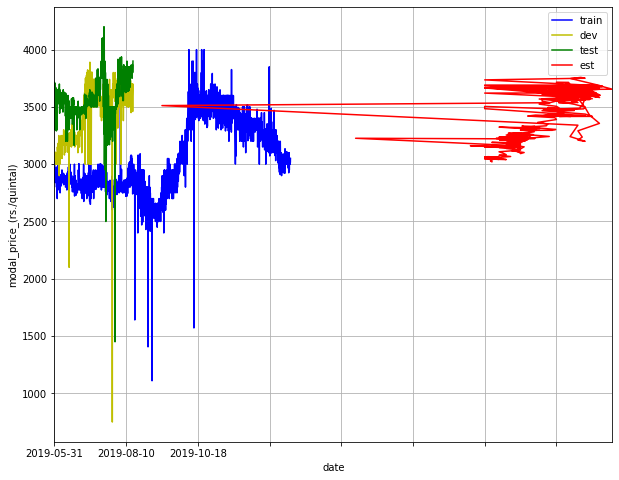

In [57]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

est_df = pd.DataFrame({'est': est.reshape(-1), 
                       'y_cv': y_cv.reshape(-1),
                       'date': cv['modal_price_(rs./quintal)']})

ax = train.plot(x='date', y='modal_price_(rs./quintal)', style='b-', grid=True)
ax = cv.plot(x='date', y='modal_price_(rs./quintal)', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='modal_price_(rs./quintal)', style='g-', grid=True, ax=ax)
ax = est_df.plot(x='date', y='est', style='r-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'est'])
ax.set_xlabel("date")
ax.set_ylabel("modal_price_(rs./quintal)")

In [58]:
est.astype(int)

array([[3021],
       [3029],
       [3030],
       [3035],
       [3040],
       [3041],
       [3045],
       [3050],
       [3059],
       [3062],
       [3061],
       [3063],
       [3065],
       [3064],
       [3060],
       [3057],
       [3048],
       [3042],
       [3045],
       [3051],
       [3045],
       [3040],
       [3048],
       [3058],
       [3059],
       [3067],
       [3077],
       [3083],
       [3095],
       [3108],
       [3118],
       [3122],
       [3136],
       [3154],
       [3161],
       [3144],
       [3142],
       [3143],
       [3150],
       [3146],
       [3142],
       [3138],
       [3146],
       [3147],
       [3166],
       [3154],
       [3144],
       [3141],
       [3159],
       [3163],
       [3167],
       [3166],
       [3173],
       [3176],
       [3190],
       [3188],
       [3184],
       [3181],
       [3183],
       [3185],
       [3193],
       [3195],
       [3195],
       [3196],
       [3212],
       [3214],
       [32

In [59]:
print(io.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2745 entries, 134590 to 133869
Data columns (total 2 columns):
date                         2745 non-null object
modal_price_(rs./quintal)    2745 non-null float64
dtypes: float64(1), object(1)
memory usage: 64.3+ KB
None


In [60]:
param_label = 'N'
param_list = range(3, 60)

error_rate = {param_label: [], 'rmse': [], 'mape_pct': []}
tic = time.time()
for param in tqdm_notebook(param_list):
    
    # Split train into x and y
    x_train_scaled, y_train_scaled = get_x_y(train_scaled, param, param)

    # Split cv into x and y
    x_cv_scaled, y_cv, mu_cv_list, std_cv_list = get_x_scaled_y(np.array(train_cv['modal_price_(rs./quintal)']).reshape(-1,1), param, num_train)
    
    # Train, predict and eval model
    np.any(np.isnan(y_cv))
    np.all(np.isfinite(y_cv))
    
    rmse, mape, _ = train_pred_eval_model(x_train_scaled, \
                                          y_train_scaled, \
                                          x_cv_scaled, \
                                          y_cv, \
                                          mu_cv_list, \
                                          std_cv_list, \
                                          lstm_units=lstm_units, \
                                          dropout_prob=dropout_prob, \
                                          optimizer=optimizer, \
                                          epochs=epochs, \
                                          batch_size=200)
    
    # Collect results
    error_rate[param_label].append(param)
    error_rate['rmse'].append(rmse)
    error_rate['mape_pct'].append(mape)
    
error_rate = pd.DataFrame(error_rate)
toc = time.time()
print("Minutes taken =" + str((toc-tic)/60.0))
error_rate

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(549, 1) (549, 1)



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [61]:
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = error_rate.plot(x='N', y='rmse', style='bx-', grid=True)
ax = error_rate.plot(x='N', y='mape_pct', style='rx-', grid=True, ax=ax)
ax.set_xlabel("N")
ax.set_ylabel("RMSE/MAPE(%)")

AttributeError: 'dict' object has no attribute 'plot'

In [62]:
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
N_opt = temp['N'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("min MAPE = %0.3f%%" % error_rate['mape_pct'].min())
print("optimum " + param_label + " = " + str(N_opt))

AttributeError: 'list' object has no attribute 'min'